In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
conn= engine.connect()

In [20]:
# reflect an existing database into a new model
Base= automap_base()
Base.prepare(engine, reflect= True)
# reflect the tables

In [21]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [22]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [23]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [24]:
inspector=inspect(engine)

# Exploratory Climate Analysis

In [27]:
columns=inspector.get_columns('measurement')
for column in columns:
    print(column['name'])

id
station
date
prcp
tobs


Text(0, 0.5, 'Percipitions (Inches)')

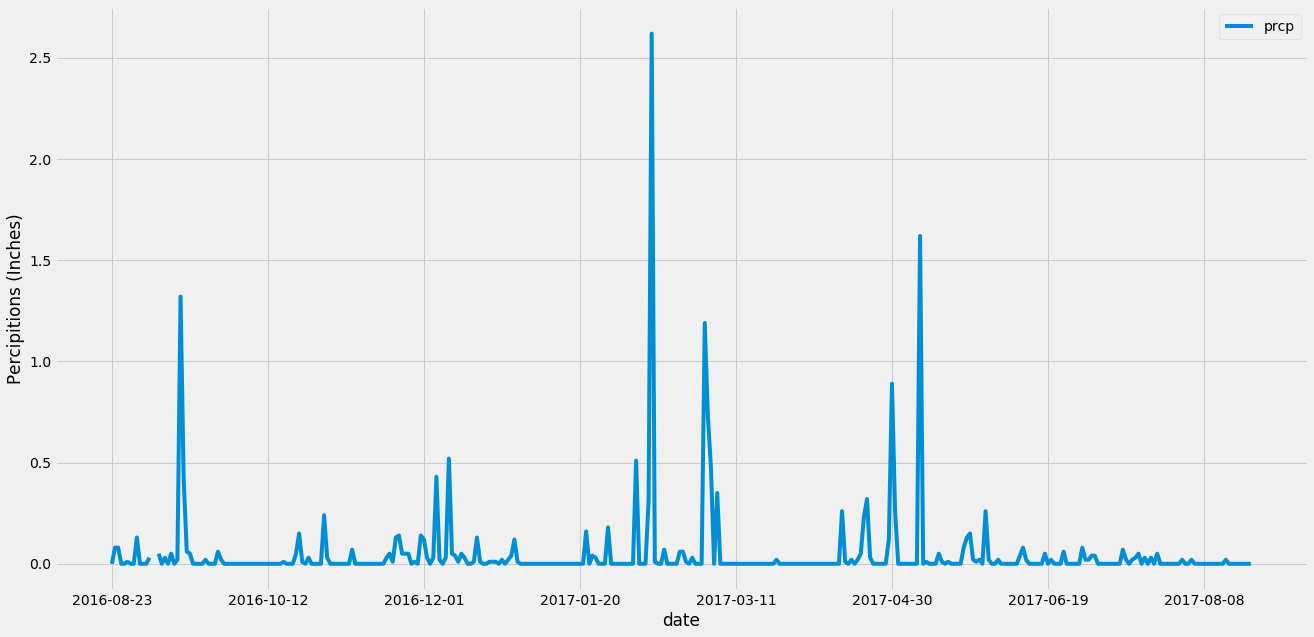

In [52]:
# Design a query to retrieve the last 12 
#months of precipitation data and plot the results
p_data= session.query(measurement.date,measurement.prcp).group_by\
(measurement.date).order_by(measurement.date.desc())

# Calculate the date 1 year ago from the last 
#data point in the database
last_date=session.query(measurement.date,measurement.prcp).group_by\
(measurement.date).order_by(measurement.date.desc()).first()
last_date
yr_ago= "2016-08-23"

# Perform a query to retrieve the data and precipitation scores
one_year=session.query(measurement.date,measurement.prcp).group_by\
(measurement.date).filter(measurement.date>= yr_ago)
# Save the query results as a Pandas 
#DataFrame and set the index to the date column
one_year_df= pd.DataFrame(one_year)
oneyear_df=one_year_df.set_index('date')
# Sort the dataframe by date
oneyear_df=oneyear_df.sort_values('date')
# Use Pandas Plotting with Matplotlib to plot the data
fig,ax= plt.subplots(figsize=(20,10))
oneyear_df.plot(ax=ax)
ax.set_ylabel("Percipitions (Inches)")

In [54]:
# Use Pandas to calcualte the summary statistics 
#for the precipitation data
oneyear_df.describe()

,prcp
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


In [63]:
# Design a query to show how many stations are available in this dataset?
s_columns=inspector.get_columns('station')
station_count= session.query(station.station).count()
print(f"There are {station_count} stations.")

There are 9 stations.


In [68]:
# What are the most active stations? (i.e. what stations 
#have the most rows)? 
#List the stations and the counts in descending order.
a_stations=session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [86]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_a_stations= a_stations[0][0]
temp= session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
filter(measurement.station==most_a_stations).all()
min_temp= temp[0][0]
max_temp= temp[0][1]
avg_temp=temp[0][2]

print(f"The max temperature is {max_temp}")
print(f"The min temperature is {min_temp}")
print(f"The avg temperature is {avg_temp}")

The max temperature is 85.0
The min temperature is 54.0
The avg temperature is 71.66378066378067


('USC00511918', 1979)


Text(0.5, 0, 'Temperature')

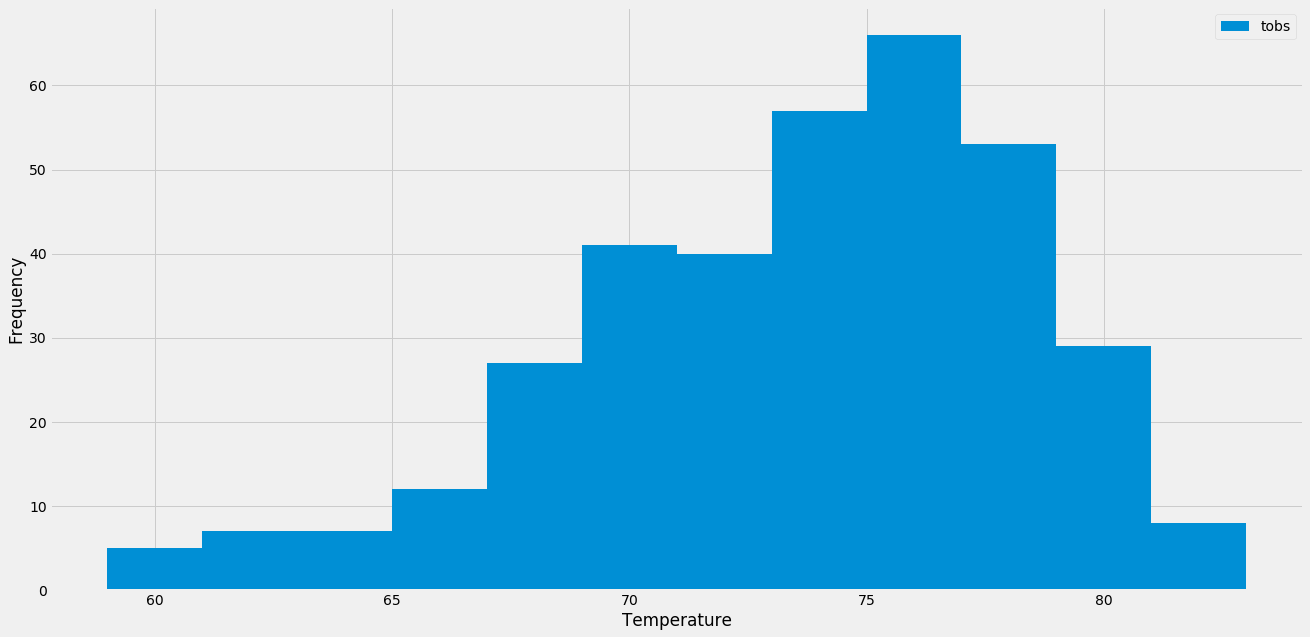

In [104]:
# Choose the station with the highest number of temperature observations.
station_temp_max= session.query(measurement.station,func.count(measurement.tobs)).group_by(measurement.station).first()
print (station_temp_max)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data= session.query(measurement.tobs, measurement.date).filter(measurement.date>= yr_ago).\
filter(measurement.station== most_a_stations).all()

temp_data_df= pd.DataFrame(temp_data)
temp_data_df.set_index('date')

fig,ax= plt.subplots(figsize=(20,10))
temp_data_df.plot(kind='hist', bins= 12, ax=ax)
ax.set_xlabel("Temperature")


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
